In [1]:
# Import Library

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import datasets
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

Untuk melihat informasi mengenai data, gunakan fungsi info(). Selain itu, Anda juga bisa melihat lima data teratas pada dataset menggunakan fungsi head().

In [2]:
df = pd.read_excel("https://github.com/risqikhoirul/DataMining/raw/main/Iris%20-%20Semester%203.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dari output di atas, kita dapat mengidentifikasi kolom yang tidak penting pada dataset yaitu kolom "Id". Untuk menghilangkan kolom tersebut, gunakan fungsi drop().

In [5]:
# menghilangkan kolom yang tidak penting
df.drop('Id',axis=1,inplace=True)

Sebelum melatih model kita perlu memisahkan atribut dengan label. Selain itu, kita juga perlu membagi dataset menjadi data latih dan data uji. Jalankan kode berikut untuk menerapkan tahapan di atas.

In [7]:
# memisahkan atribut dan label
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = df['Species']

Data Uji  0.1 atau 10%, berati data testingnya sisanya yaitu 90%

In [22]:
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Selanjutnya, definisikan model decision tree yang akan kita gunakan. Kemudian,  latih model menggunakan data latih menggunakan fungsi fit().

In [23]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

Setelah model dilatih, uji model menggunakan data uji untuk melihat seberapa baik model yang telah kita buat. Pengujian model ini bisa dilakukan dengan menggunakan fungsi predict().

Berikutnya, gunakan metrik akurasi untuk melihat seberapa baik model yang telah kita latih. Penjelasan terkait metrik akurasi ini akan dibahas pada modul selanjutnya.

In [24]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  1.0


Nah, kita bisa mencoba model yang telah kita buat untuk memprediksi spesies dari sebuah bunga Iris. Masih ingat bukan, atribut yang menjadi masukan dari model adalah panjang sepal, lebar sepal, panjang petal, dan lebar petal? Kita akan memasukkan nilai yang sesuai dengan format tersebut secara berurutan dalam satuan centimeter. Pada contoh berikut, kita ingin memprediksi spesies dari sebuah bunga iris  yang memiliki panjang sepal 6,2 centimeter, lebar sepal 3,4 centimeter, panjang petal 5,4 centimeter, dan lebar petal 2,3 centimeter.

In [25]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Membuat pohon keputusan versi text

In [28]:
# Membuat deskripsi pohon keputusan
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |--- PetalLengthCm <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- PetalLengthCm >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: Iris-virginica



Membuat pohon keputusan versi gambar

In [29]:
# Membuat dan menyimpan gambar pohon keputusan
dot_data = export_graphviz(tree_model, out_file=None, feature_names=list(X.columns), class_names=df["Species"].unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png", cleanup=True)

'iris_decision_tree.png'

Menampilkan gambar

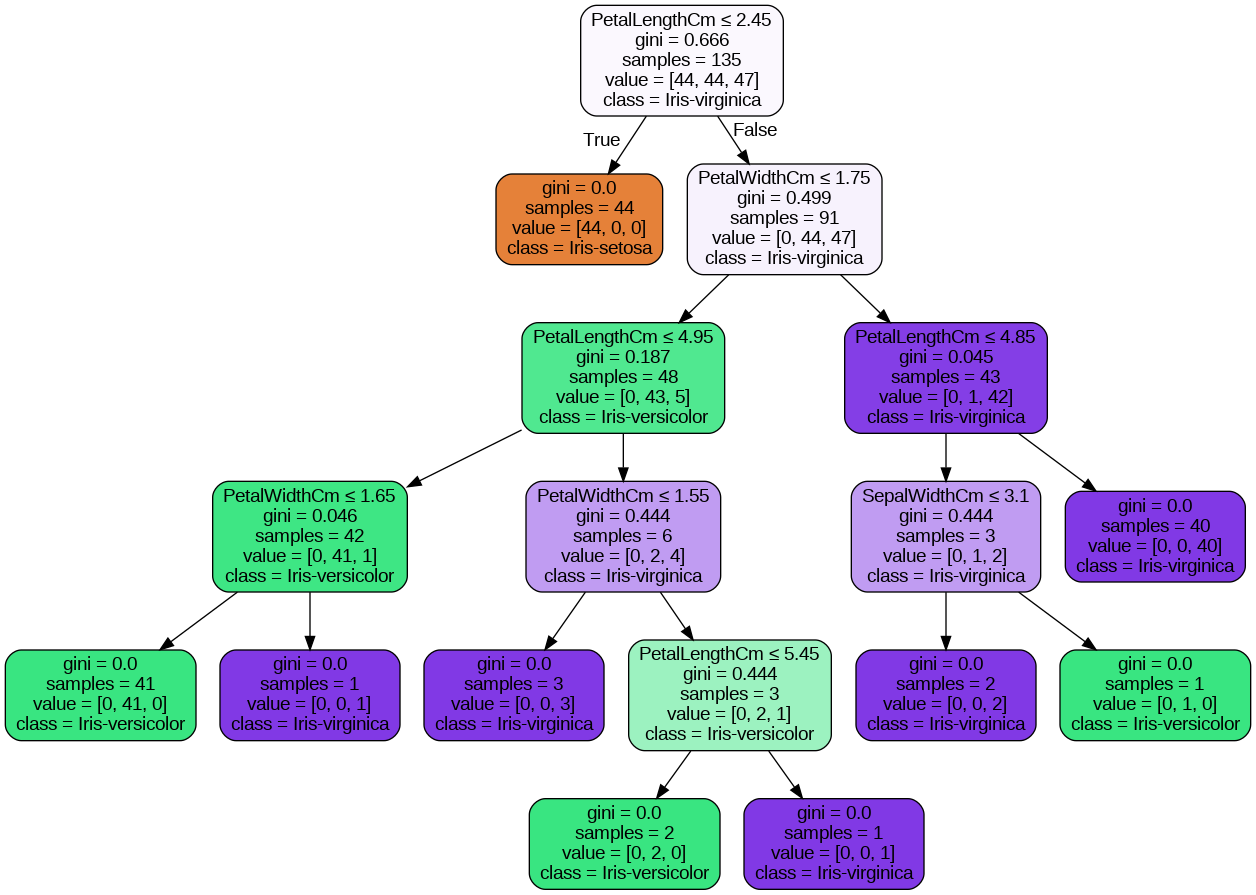

In [30]:
from IPython.display import Image

# Ganti 'iris_decision_tree.png' dengan nama file gambar yang telah Anda buat
Image(filename='iris_decision_tree.png')